## Mini Batch Gradient Descent

What is Gradient Descent? 
Gradient Descent is an optimization algorithm used to minimize the cost of loss function of machine learning models, particularly in linear regression or neural network.

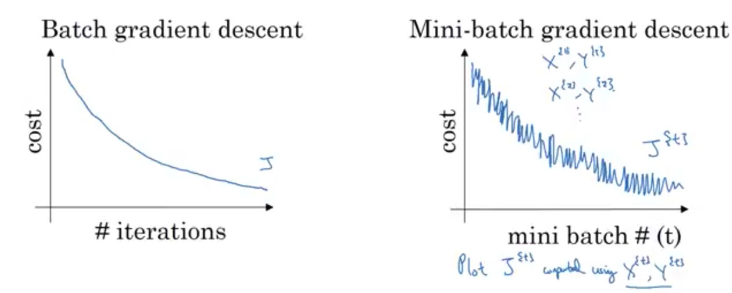

In [1]:
# Step 1: Import libraries 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Step 2: Create a Simple Dataset
np.random.seed(42)
X = 2 * np.random.rand(1000, 1)
y = 4 + 3* X + np.random.randn(1000,1) # Linear Relationship with noise

In [3]:
# Step 3: Define the loss function

def compute_loss(X, y, w, b):
    m = len(y)
    predictions = X.dot(w) + b 
    loss = (1/(2*m)) * np.sum((predictions -y)**2)
    return loss

In [4]:
# step 4: Mini-batch Gradeint descent Algorithm

def mini_batch_gradient_descent(X, y , batch_size = 20, learning_rate = 0.01, epochs = 100):
    m, n = X.shape
    w = np.random.randn(n,1) # Initailize Weight Randomly
    b = np.random.randn() # Bias
    losses = []

    for epoch in range(epochs):
        # shuffle the dataset
        indices = np.random.permutation(m)
        X_shuffled, y_shuffled = X[indices], y[indices]

        for i in range(0, m, batch_size):
            # create a mini-batch
            X_batch = X_shuffled[i:i + batch_size]
            y_batch = y_shuffled[i:i + batch_size]

            # compare gradients
            predictions = X_batch.dot(w) + b 
            error = predictions - y_batch

            gradient_w = (1/batch_size)* X_batch.T.dot(error)
            gradient_b = (1/batch_size) * np.sum(error)

            # Update weight
            w-= learning_rate * gradient_w
            b-= learning_rate * gradient_b

        # compute and store loss after each epoch
        loss = compute_loss(X, y, w, b)
        losses.append(loss)

        # print loss every 10 epochs
        if epoch % 10 ==0:
            print(f"Epoch {epoch}: Loss = {loss:.4f}")

    return w, b, losses
        

In [5]:
w_optimal, b_optimal, losses = mini_batch_gradient_descent(X, y, batch_size=32, learning_rate=0.01, epochs=100)


Epoch 0: Loss = 10.6416
Epoch 10: Loss = 0.4920
Epoch 20: Loss = 0.4892
Epoch 30: Loss = 0.4881
Epoch 40: Loss = 0.4877
Epoch 50: Loss = 0.4876
Epoch 60: Loss = 0.4875
Epoch 70: Loss = 0.4875
Epoch 80: Loss = 0.4875
Epoch 90: Loss = 0.4875


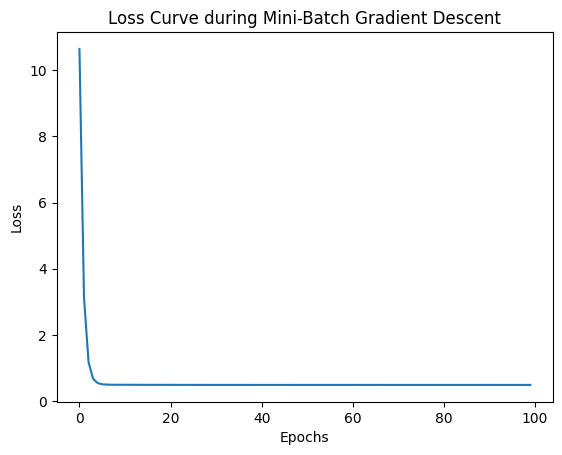

In [6]:
# Step 6: Plotting the loss curve

plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve during Mini-Batch Gradient Descent")
plt.show()